In [ ]:
!pip install prophet


In [ ]:
# Import necessary libraries
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the dataset into a Pandas DataFrame
sf = pd.read_csv('/content/Police_Department_Incident_Reports__2018_to_Present_20231014.csv',error_bad_lines=False)

<ipython-input-63-91457cc01b95>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  sf = pd.read_csv('/content/Police_Department_Incident_Reports__2018_to_Present_20231014.csv',error_bad_lines=False)


# Data Acquisition and Cleaning

In [ ]:
# Display the first few rows of the DataFrame
sf.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,3/13/23 23:41,3/13/23,23:41,2023,Monday,3/13/23 23:41,1.253740e+11,1253736,230167874,NaN,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/1/23 5:02,3/1/23,5:02,2023,Wednesday,3/11/23 15:40,1.253800e+11,1253795,236046151,NaN,II,Coplogic Initial,True,6374,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, >$950",Open or Active,NaN,NaN,Mission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/13/23 13:16,3/13/23,13:16,2023,Monday,3/13/23 13:17,1.253570e+11,1253571,220343896,NaN,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/13/23 10:59,3/13/23,10:59,2023,Monday,3/13/23 11:00,1.253550e+11,1253551,230174885,NaN,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/14/23 18:44,3/14/23,18:44,2023,Tuesday,3/14/23 18:45,1.254020e+11,1254024,230176728,NaN,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display the last few rows of the DataFrame
sf.tail()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
783436,3/22/23 13:30,3/22/23,13:30,2023,Wednesday,3/22/23 13:35,1.256850e+11,1256853,230201949,230811847.0,II,Initial,NaN,3401,Robbery,Robbery - Commercial,"Shoplifting, Force against Agent",Cite or Arrest Adult,24TH ST \ POTRERO AVE,23953000.0,Mission,Mission,9.0,9.0,37.753004,-122.406336,POINT (-122.40633623830558 37.75300402962228),54.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0
783437,3/22/23 0:13,3/22/23,0:13,2023,Wednesday,3/22/23 0:13,1.256650e+11,1256652,230200838,230810020.0,II,Initial,NaN,6371,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, <$50",Cite or Arrest Adult,SACRAMENTO ST \ DIVISADERO ST,26821000.0,Northern,Pacific Heights,2.0,2.0,37.788995,-122.440624,POINT (-122.44062361999508 37.78899525864335),102.0,NaN,NaN,NaN,NaN,NaN,6.0,4.0
783438,3/21/23 21:19,3/21/23,21:19,2023,Tuesday,3/21/23 22:16,1.256640e+11,1256642,230200800,230803734.0,II,Initial,NaN,72000,Non-Criminal,Non-Criminal,Found Property,Open or Active,MISSION ST \ ACTON ST \ SICKLES AVE,21552000.0,Ingleside,Outer Mission,11.0,11.0,37.708806,-122.452665,POINT (-122.45266472219633 37.70880633652071),66.0,NaN,NaN,NaN,NaN,NaN,1.0,9.0
783439,3/22/23 15:28,3/22/23,15:28,2023,Wednesday,3/22/23 17:51,1.256870e+11,1256873,230202486,230812680.0,II,Initial,NaN,6303,Larceny Theft,Larceny Theft - From Building,"Theft, From Building, $200-$950",Open or Active,BUSH ST \ GRANT AVE,24741000.0,Central,Financial District/South Beach,3.0,3.0,37.790565,-122.405574,POINT (-122.40557374633903 37.790565236529574),19.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
783440,3/21/23 17:42,3/21/23,17:42,2023,Tuesday,3/22/23 9:40,1.256770e+11,1256767,230201450,230811015.0,VI,Vehicle Initial,NaN,7021,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Auto",Open or Active,GIRARD ST \ MANSELL ST,20572000.0,Bayview,Portola,9.0,9.0,37.721277,-122.402057,POINT (-122.40205647302719 37.72127745117722),91.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0


# Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
# Get the shape (number of rows and columns) of the DataFrame
sf.shape

(783441, 35)

In [ ]:
# Print the number of rows and columns
print("Number of Rows",sf.shape[0])
print("Number of Columns",sf.shape[1])

Number of Rows 783441
Number of Columns 35


In [ ]:
# Display information about the DataFrame, including data types and non-null counts
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783441 entries, 0 to 783440
Data columns (total 35 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Datetime                                     783441 non-null  object 
 1   Incident Date                                         783441 non-null  object 
 2   Incident Time                                         783441 non-null  object 
 3   Incident Year                                         783441 non-null  int64  
 4   Incident Day of Week                                  783441 non-null  object 
 5   Report Datetime                                       783441 non-null  object 
 6   Row ID                                                783441 non-null  float64
 7   Incident ID                                           783441 non-null  int64  
 8   Incident Number                             

# Check Null Values In The Dataset

In [ ]:
# Check for missing values in the DataFrame
sf.isnull().sum()

Incident Datetime                                            0
Incident Date                                                0
Incident Time                                                0
Incident Year                                                0
Incident Day of Week                                         0
Report Datetime                                              0
Row ID                                                       0
Incident ID                                                  0
Incident Number                                              0
CAD Number                                              176929
Report Type Code                                             0
Report Type Description                                      0
Filed Online                                            625268
Incident Code                                                0
Incident Category                                          699
Incident Subcategory                                   

# Select Only The Necessary Columns

In [ ]:
# Convert the 'Incident Datetime' column to datetime format and rename it to 'Date'
sf.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District',
       'Supervisor District 2012', 'Latitude', 'Longitude', 'Point',
       'Neighborhoods', 'ESNCAG - Boundary File',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Civic Center Harm Reduction Project Boundary',
       'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas',
       'Current Supervisor Districts', 'Current Police Districts'],
      dtype='object')

In [ ]:
# Convert the 'Incident Datetime' column to DateTime format and rename it to 'Date'
sf['Incident Datetime'] = pd.to_datetime(sf['Incident Datetime'])
sf= sf.rename(columns={"Incident Datetime":"Date"})

In [ ]:
# Create a new DataFrame 'sf1' with selected columns
sf1 = sf[['Incident ID','Date','Incident Category','Intersection','Resolution','Incident Day of Week','Police District']]

In [ ]:
# Display the first few rows of the new DataFrame
sf1.head()

,Incident ID,Date,Incident Category,Intersection,Resolution,Incident Day of Week,Police District
0,1253736,2023-03-13 23:41:00,Recovered Vehicle,NaN,Open or Active,Monday,Out of SF
1,1253795,2023-03-01 05:02:00,Larceny Theft,NaN,Open or Active,Wednesday,Mission
2,1253571,2023-03-13 13:16:00,Recovered Vehicle,NaN,Open or Active,Monday,Out of SF
3,1253551,2023-03-13 10:59:00,Recovered Vehicle,NaN,Open or Active,Monday,Out of SF
4,1254024,2023-03-14 18:44:00,Recovered Vehicle,NaN,Open or Active,Tuesday,Out of SF


In [ ]:
# Check for missing values in the new DataFrame
sf1.isnull().sum()

Incident ID                 0
Date                        0
Incident Category         699
Intersection            42556
Resolution                  0
Incident Day of Week        0
Police District             0
dtype: int64

In [ ]:
# Drop rows with missing values in the new DataFrame
sf1 = sf1.dropna()

In [ ]:
# Check for missing values again
sf1.isnull().sum()

Incident ID             0
Date                    0
Incident Category       0
Intersection            0
Resolution              0
Incident Day of Week    0
Police District         0
dtype: int64

In [ ]:
# Display information about the new DataFrame
sf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740200 entries, 9 to 783440
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Incident ID           740200 non-null  int64         
 1   Date                  740200 non-null  datetime64[ns]
 2   Incident Category     740200 non-null  object        
 3   Intersection          740200 non-null  object        
 4   Resolution            740200 non-null  object        
 5   Incident Day of Week  740200 non-null  object        
 6   Police District       740200 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 45.2+ MB


In [ ]:
# Display column names of the new DataFrame
sf1.columns

Index(['Incident ID', 'Date', 'Incident Category', 'Intersection',
       'Resolution', 'Incident Day of Week', 'Police District'],
      dtype='object')

# Data Exploration and Visualization

In [ ]:
# Display the top 10 incident categories and their counts
sf1['Incident Category'].value_counts().head(10)

Larceny Theft          216659
Other Miscellaneous     53234
Malicious Mischief      50743
Assault                 47382
Non-Criminal            45479
Burglary                43285
Motor Vehicle Theft     41080
Fraud                   24933
Recovered Vehicle       22463
Warrant                 21917
Name: Incident Category, dtype: int64

# Find The Top crime incident day of the week

In [ ]:
# Display the top 10 days of the week with the highest incident counts
sf1['Incident Day of Week'].value_counts().head(10)

Friday       113347
Wednesday    110193
Thursday     106055
Monday       104788
Tuesday      104314
Saturday     104267
Sunday        97236
Name: Incident Day of Week, dtype: int64

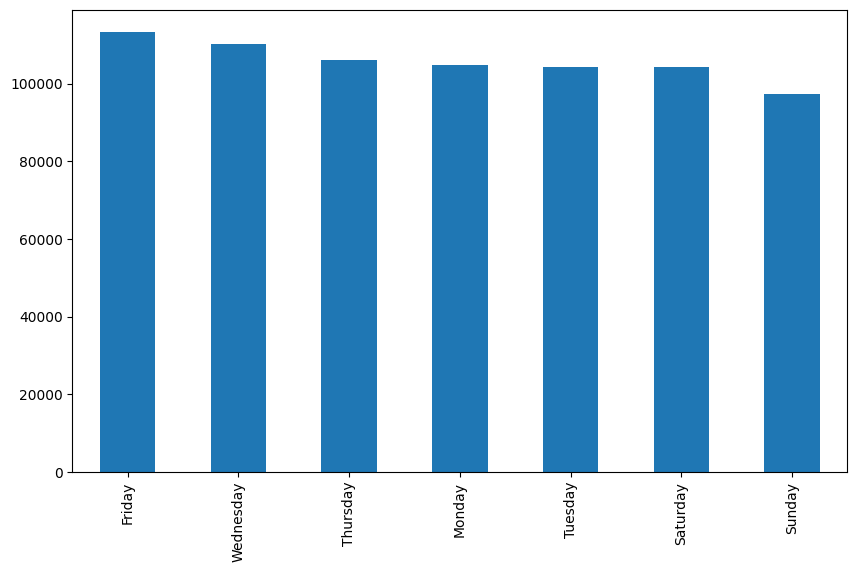

In [ ]:
# Plot a bar chart of incident counts by day of the week
sf1['Incident Day of Week'].value_counts().plot(kind = 'bar',figsize = (10,6))
plt.show()

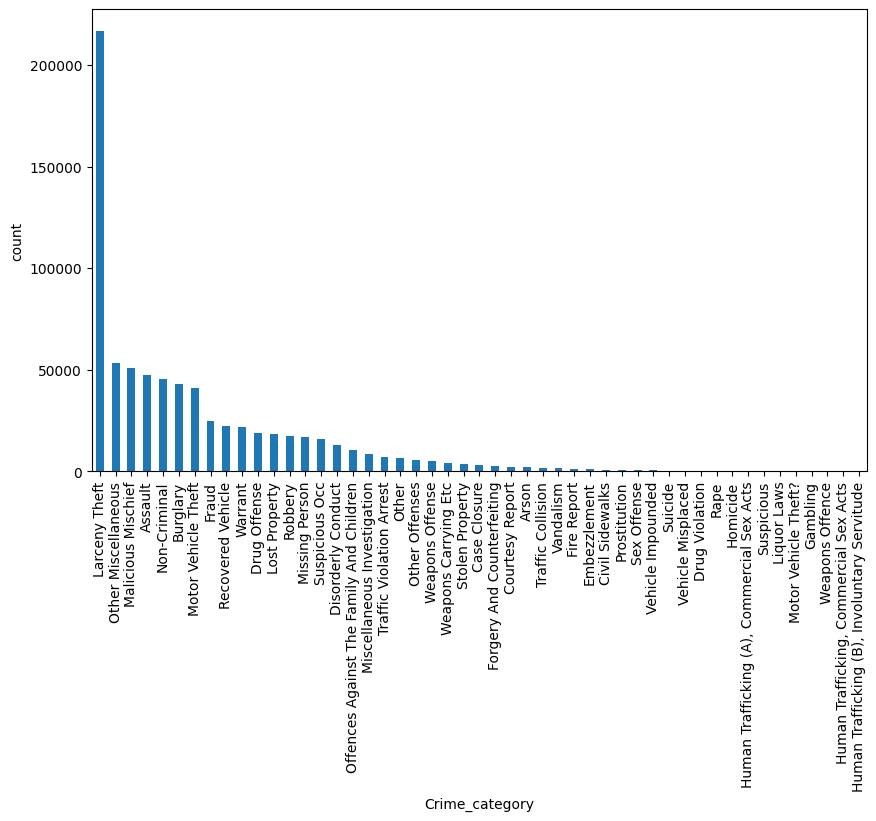

In [ ]:
# Plot a bar chart of incident counts by category
sf1['Incident Category'].value_counts().plot(kind = 'bar',figsize = (10,6))
plt.ylabel('count')
plt.xlabel('Crime_category')
plt.show()

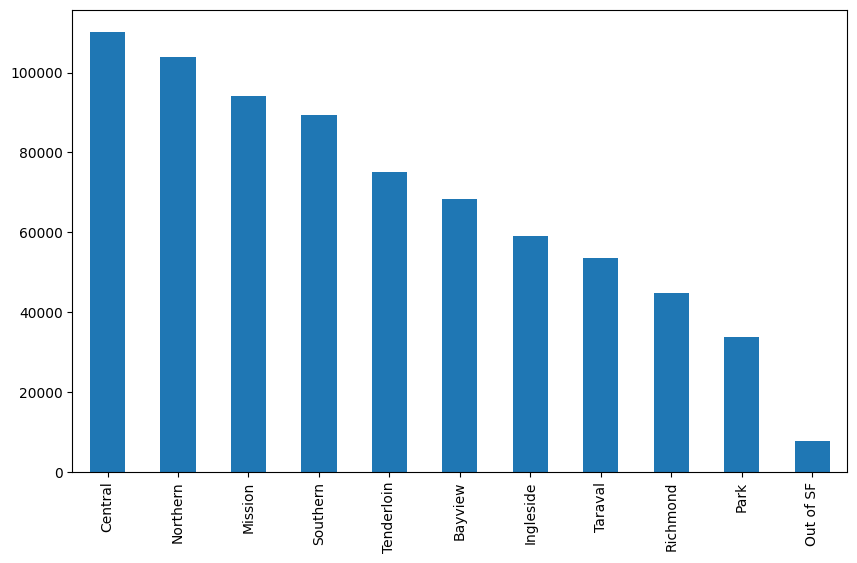

In [ ]:
# Plot a bar chart of incident counts by police district
sf1['Police District'].value_counts().plot(kind = 'bar',figsize = (10,6))
plt.show()

# Time Series Analysis

In [ ]:
# Set the DataFrame index to the 'Date' column
sf1.index = pd.DatetimeIndex(sf1.Date)

In [ ]:
sf1

,Incident ID,Date,Incident Category,Intersection,Resolution,Incident Day of Week,Police District
Date,,,,,,,
2023-03-11 14:00:00,1254318,2023-03-11 14:00:00,Assault,STANYAN ST \ HAYES ST,Open or Active,Saturday,Park
2022-06-27 12:00:00,1254393,2022-06-27 12:00:00,Lost Property,GEARY ST \ POWELL ST,Open or Active,Monday,Central
2023-03-16 17:30:00,1254826,2023-03-16 17:30:00,Assault,18TH ST \ DE HARO ST,Open or Active,Thursday,Bayview
2023-03-21 15:50:00,1256563,2023-03-21 15:50:00,Non-Criminal,POST ST \ LARKIN ST,Open or Active,Tuesday,Northern
2021-08-22 09:40:00,1062676,2021-08-22 09:40:00,Warrant,LAGUNA ST \ PACIFIC AVE,Open or Active,Sunday,Northern
...,...,...,...,...,...,...,...
2023-03-22 13:30:00,1256853,2023-03-22 13:30:00,Robbery,24TH ST \ POTRERO AVE,Cite or Arrest Adult,Wednesday,Mission
2023-03-22 00:13:00,1256652,2023-03-22 00:13:00,Larceny Theft,SACRAMENTO ST \ DIVISADERO ST,Cite or Arrest Adult,Wednesday,Northern
2023-03-21 21:19:00,1256642,2023-03-21 21:19:00,Non-Criminal,MISSION ST \ ACTON ST \ SICKLES AVE,Open or Active,Tuesday,Ingleside


Text(0, 0.5, 'Number of Crimes')

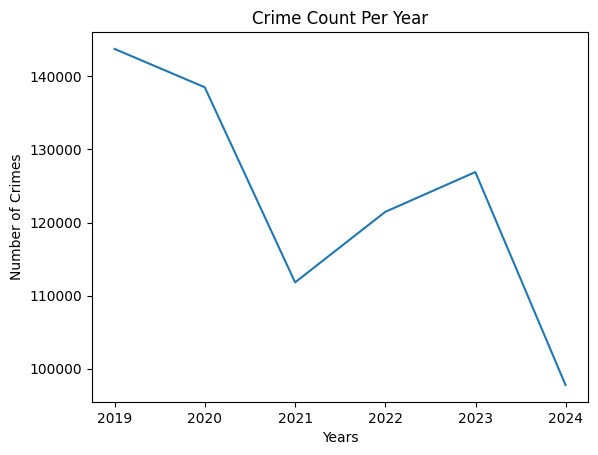

In [ ]:

# Plot the crime count per year
plt.plot(sf1.resample('Y').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

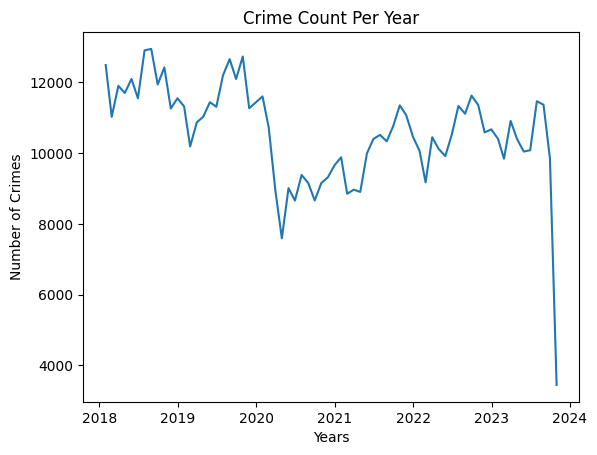

In [ ]:
# Plot the crime count per month
plt.plot(sf1.resample('M').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

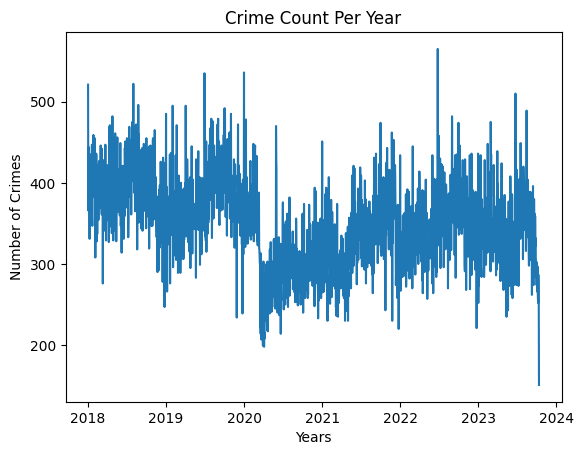

In [ ]:
# Plot the crime count per day
plt.plot(sf1.resample('D').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

# Modeling using Prophet Library

In [ ]:
#Preparing The data

In [ ]:
# Create a new DataFrame 'sf_prophet' with daily crime counts
sf_prophet = pd.DataFrame(sf1.resample('D').size().reset_index())

In [ ]:
# Rename columns for Prophet model compatibility
sf_prophet.columns =['Date','Crime Count']

In [ ]:
sf_prophet

,Date,Crime Count
0,2018-01-01,521
1,2018-01-02,366
2,2018-01-03,396
3,2018-01-04,444
4,2018-01-05,407
...,...,...
2107,2023-10-09,252
2108,2023-10-10,287
2109,2023-10-11,277
2110,2023-10-12,253


In [ ]:
#Rename The Columns
# ds and y
# Rename columns for Prophet model compatibility
sf_prophet=sf_prophet.rename(columns={'Date':'ds','Crime Count':'y'})
sf_prophet

,ds,y
0,2018-01-01,521
1,2018-01-02,366
2,2018-01-03,396
3,2018-01-04,444
4,2018-01-05,407
...,...,...
2107,2023-10-09,252
2108,2023-10-10,287
2109,2023-10-11,277
2110,2023-10-12,253


In [ ]:

sf_prophet = sf_prophet.sort_values(by='ds')

In [ ]:
sf_prophet. # 6 years data

,ds,y
0,2018-01-01,521
1,2018-01-02,366
2,2018-01-03,396
3,2018-01-04,444
4,2018-01-05,407
...,...,...
2107,2023-10-09,252
2108,2023-10-10,287
2109,2023-10-11,277
2110,2023-10-12,253


<Axes: xlabel='ds'>

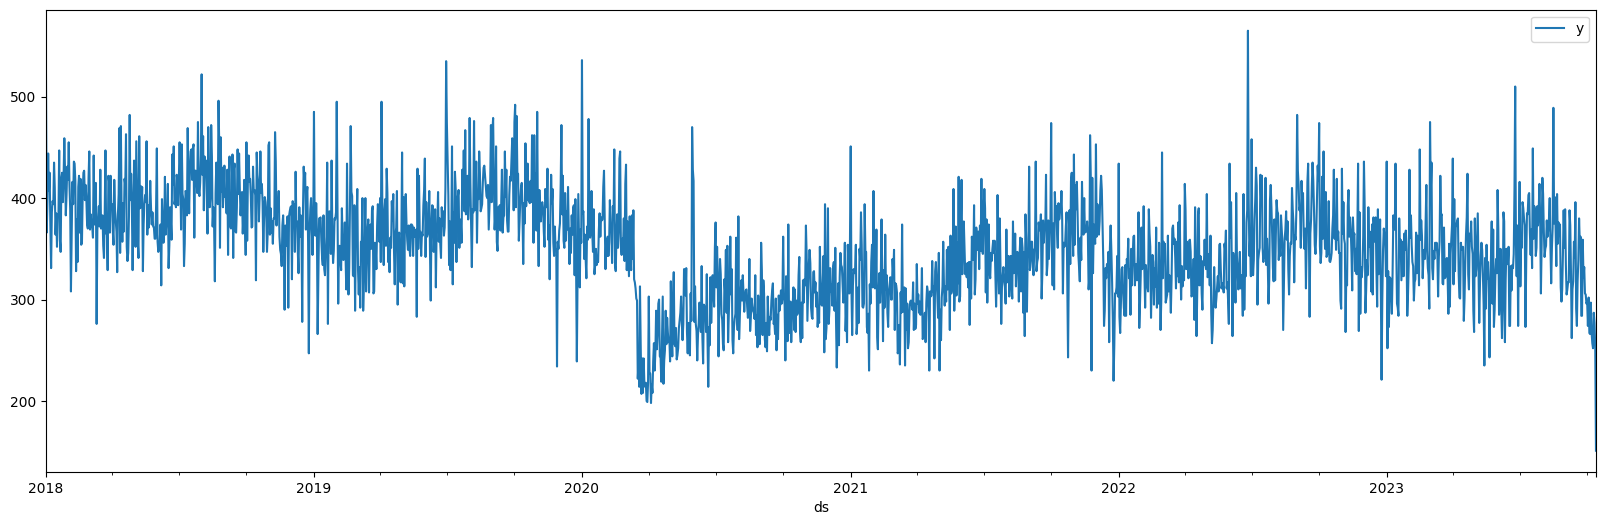

In [ ]:
# Plot the time series of crime counts
sf_prophet.plot(x='ds', y='y' , figsize=(20,6))

In [ ]:
len(sf_prophet)

2112

In [ ]:
# Split the data into training and test sets
train = sf_prophet.iloc[:int(len(sf_prophet)-286)] # 5years data from 1st jan 2018 to 31st dec 2022
test = sf_prophet.iloc[int(len(sf_prophet)-286):] # 1st January 2023 to 13 oct 2023

In [ ]:
# Display the last 5 rows of the training set
train.tail(5)

,ds,y
1821,2022-12-27,349
1822,2022-12-28,370
1823,2022-12-29,362
1824,2022-12-30,357
1825,2022-12-31,323


In [ ]:
test.head()

,ds,y
1826,2023-01-01,436
1827,2023-01-02,252
1828,2023-01-03,328
1829,2023-01-04,273
1830,2023-01-05,322


In [ ]:
#Train The Model
# Initialize a Prophet model
model = Prophet()
# Fit the model on the training data
model.fit(train)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9drr6aow/9w3olhxb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9drr6aow/tpve9uar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16286', 'data', 'file=/tmp/tmp9drr6aow/9w3olhxb.json', 'init=/tmp/tmp9drr6aow/tpve9uar.json', 'output', 'file=/tmp/tmp9drr6aow/prophet_modely9oj5q21/prophet_model-20231202195830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:58:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:58:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Make The Predictions
# Create a future DataFrame for predictions
future = model.make_future_dataframe(periods=286,freq='D')

# Generate predictions on the future DataFrame
forecast = model.predict(future)

In [ ]:
# Display the last 10 rows of the forecast
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2102,2023-10-04,360.763379,344.388407,447.130074,339.085239,382.740977,34.731645,34.731645,34.731645,13.233052,13.233052,13.233052,21.498593,21.498593,21.498593,0.0,0.0,0.0,395.495025
2103,2023-10-05,360.789891,332.279530,437.540062,338.896359,382.912743,20.837317,20.837317,20.837317,-0.437705,-0.437705,-0.437705,21.275022,21.275022,21.275022,0.0,0.0,0.0,381.627208
2104,2023-10-06,360.816402,355.791155,462.252283,338.719959,383.094319,46.005296,46.005296,46.005296,24.979802,24.979802,24.979802,21.025494,21.025494,21.025494,0.0,0.0,0.0,406.821699
2105,2023-10-07,360.842914,328.093410,429.591399,338.573665,383.197968,16.910993,16.910993,16.910993,-3.844974,-3.844974,-3.844974,20.755967,20.755967,20.755967,0.0,0.0,0.0,377.753907
2106,2023-10-08,360.869426,302.773926,405.607130,338.499028,383.325224,-5.992808,-5.992808,-5.992808,-26.465160,-26.465160,-26.465160,20.472353,20.472353,20.472353,0.0,0.0,0.0,354.876618
2107,2023-10-09,360.895937,329.153170,431.086667,338.424391,383.449518,17.195175,17.195175,17.195175,-2.985198,-2.985198,-2.985198,20.180373,20.180373,20.180373,0.0,0.0,0.0,378.091112
2108,2023-10-10,360.922449,326.838674,425.772605,338.349755,383.592217,15.405608,15.405608,15.405608,-4.479816,-4.479816,-4.479816,19.885425,19.885425,19.885425,0.0,0.0,0.0,376.328057
2109,2023-10-11,360.948961,340.212186,443.234465,338.275118,383.721870,32.825506,32.825506,32.825506,13.233052,13.233052,13.233052,19.592454,19.592454,19.592454,0.0,0.0,0.0,393.774467
2110,2023-10-12,360.975472,326.513399,435.195576,338.200481,383.846509,18.868144,18.868144,18.868144,-0.437705,-0.437705,-0.437705,19.305849,19.305849,19.305849,0.0,0.0,0.0,379.843616
2111,2023-10-13,361.001984,358.118848,457.033215,338.127419,383.951941,44.009147,44.009147,44.009147,24.979802,24.979802,24.979802,19.029345,19.029345,19.029345,0.0,0.0,0.0,405.011131


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2107,2023-10-09,378.091112,329.153170,431.086667
2108,2023-10-10,376.328057,326.838674,425.772605
2109,2023-10-11,393.774467,340.212186,443.234465
2110,2023-10-12,379.843616,326.513399,435.195576
2111,2023-10-13,405.011131,358.118848,457.033215


In [ ]:
test.tail()

,ds,y
2107,2023-10-09,252
2108,2023-10-10,287
2109,2023-10-11,277
2110,2023-10-12,253
2111,2023-10-13,151


In [ ]:
# Plot the Prophet model predictions using Plotly
plot_plotly(model,forecast)

In [ ]:
# Plot components of the Prophet model using Plotly
plot_components_plotly(model,forecast)

# Evaluate the **Model**

In [ ]:
# Calculate Root Mean Squared Error (RMSE) between predicted and actual values
from statsmodels.tools.eval_measures import rmse

In [ ]:
# Extract the predicted values for the test set
predictions = forecast.iloc[-286:]['yhat']
predictions

1826    318.390288
1827    341.820282
1828    340.361250
1829    358.195306
1830    344.729762
           ...    
2107    378.091112
2108    376.328057
2109    393.774467
2110    379.843616
2111    405.011131
Name: yhat, Length: 286, dtype: float64

In [ ]:
rmse_value = rmse(predictions, test['y'])
print("Root Mean Squared Error between actual and predicted values: ",rmse_value)
mean_value = test['y'].mean()
print("Mean Value of Test Dataset: ", mean_value)
percentage_rmse = (rmse_value/ mean_value)*100
print("the percentage of the Root Mean Squared Error (RMSE) relative to the mean value:{:.2f}%".format(percentage_rmse))

Root Mean Squared Error between actual and predicted values:  47.72159341772332
Mean Value of Test Dataset:  341.9230769230769
the percentage of the Root Mean Squared Error (RMSE) relative to the mean value:13.96%
